# EE0005 Group Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
sb.set()


    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [2]:
heartdata = pd.read_csv('cardio_train.csv')
heartdata.head(n = 10000)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14249,20427,1,166,65.0,130,80,1,1,0,0,0,0
9996,14251,18214,1,160,93.0,140,80,2,1,0,0,1,1
9997,14252,14665,1,158,66.0,130,90,2,2,0,0,1,0
9998,14253,18328,1,168,70.0,160,80,3,1,0,0,1,1


In [3]:
heartdata.shape

(70000, 13)

In [4]:
heartdata.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [5]:
heartdata['years'] = (heartdata['age']/365).round().astype('int')
years = pd.DataFrame(heartdata['years'])
years.head()

,years
0,50
1,55
2,52
3,48
4,48


In [6]:
height = pd.DataFrame(heartdata['height'])
height.head()

,height
0,168
1,156
2,165
3,169
4,156


In [7]:
weight = pd.DataFrame(heartdata['weight'])
weight.head()

,weight
0,62.0
1,85.0
2,64.0
3,82.0
4,56.0


In [8]:
heartdata['bmi'] = heartdata['weight'] / (heartdata['height']/100)**2
bmi = pd.DataFrame(heartdata['bmi'])
bmi.head()

,bmi
0,21.967120
1,34.927679
2,23.507805
3,28.710479
4,23.011177


MAP is Mean Arterial Pressure

In [9]:
heartdata['MAP'] = ((2 * heartdata['ap_lo'] + heartdata['ap_hi'])/3)
MAP = pd.DataFrame(heartdata['MAP'])
MAP.head()

,MAP
0,90.000000
1,106.666667
2,90.000000
3,116.666667
4,73.333333


In [10]:
newheartdata = heartdata.drop(columns = ['id', 'age'])

In [11]:
newheartdata.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,90.000000
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,106.666667
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,90.000000
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,116.666667
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,73.333333


In [12]:
newheartdata.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686,27.556513,107.359371
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294,6.091511,136.493690
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784,-41.666667
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,93.333333
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.374068,93.333333
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.222222,103.333333
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,298.666667,7400.000000


In [13]:
male_df = newheartdata[newheartdata['gender'] == 1]
male_df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,106.666667
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,90.000000
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,73.333333
5,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,93.333333
6,1,157,93.0,130,80,3,1,0,0,1,0,61,37.729725,96.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54,23.661439,103.333333
69994,1,165,80.0,150,80,1,1,0,0,1,1,58,29.384757,103.333333
69996,1,158,126.0,140,90,2,2,0,0,1,1,62,50.472681,106.666667
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,98.333333


In [14]:
male_df.drop(male_df[(male_df['ap_hi'] > male_df['ap_hi'].quantile(0.975)) | (male_df['ap_hi'] < male_df['ap_hi'].quantile(0.025))].index,inplace=True)
male_df.drop(male_df[(male_df['ap_lo'] > male_df['ap_lo'].quantile(0.975)) | (male_df['ap_lo'] < male_df['ap_lo'].quantile(0.025))].index,inplace=True)
male_df.drop(male_df[(male_df['bmi'] > male_df['bmi'].quantile(0.975)) | (male_df['bmi'] < male_df['bmi'].quantile(0.025))].index,inplace=True)

C:\Users\Arion Gam\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
male_df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,40554.0,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000,40554.000000
mean,1.0,161.603640,71.996589,125.357425,80.753440,1.373971,1.230088,0.016916,0.024708,0.802042,0.490802,53.523721,27.615459,95.621435
std,0.0,6.591708,11.876450,13.948638,8.342884,0.687334,0.579575,0.128957,0.155235,0.398465,0.499922,6.628574,4.603173,9.425665
min,1.0,120.000000,30.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,20.028842,73.333333
25%,1.0,157.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,50.000000,23.951227,93.333333
50%,1.0,162.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.672763,93.333333
75%,1.0,166.000000,80.000000,130.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.487805,103.333333
max,1.0,198.000000,134.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,41.091387,121.000000


New male_df count = 40554

In [16]:
female_df = newheartdata[newheartdata['gender'] == 2]
female_df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,90.000000
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,116.666667
7,2,178,95.0,130,90,3,3,0,0,1,1,62,29.983588,103.333333
11,2,173,60.0,120,80,1,1,0,0,1,0,52,20.047446,93.333333
12,2,165,60.0,120,80,1,1,0,0,0,0,41,22.038567,93.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,2,182,110.0,130,90,2,2,0,0,1,1,48,33.208550,103.333333
69984,2,168,80.0,120,80,1,1,0,0,1,1,49,28.344671,93.333333
69986,2,180,78.0,120,80,1,1,0,0,1,0,50,24.074074,93.333333
69995,2,168,76.0,120,80,1,1,1,0,1,0,53,26.927438,93.333333


In [17]:
female_df.drop(female_df[(female_df['ap_hi'] > female_df['ap_hi'].quantile(0.975)) | (female_df['ap_hi'] < female_df['ap_hi'].quantile(0.025))].index,inplace=True)
female_df.drop(female_df[(female_df['ap_lo'] > female_df['ap_lo'].quantile(0.975)) | (female_df['ap_lo'] < female_df['ap_lo'].quantile(0.025))].index,inplace=True)
female_df.drop(female_df[(female_df['bmi'] > female_df['bmi'].quantile(0.975)) | (female_df['bmi'] < female_df['bmi'].quantile(0.025))].index,inplace=True)

C:\Users\Arion Gam\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
female_df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
count,21500.0,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000,21500.000000
mean,2.0,170.025116,76.808688,127.487860,82.305070,1.323488,1.203256,0.214233,0.103023,0.806744,0.497116,53.119488,26.522601,97.366000
std,0.0,6.651682,12.074933,13.970136,7.571438,0.647340,0.544660,0.410298,0.303996,0.394861,0.500003,6.934840,3.562157,8.928679
min,2.0,125.000000,40.000000,100.000000,69.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000,19.921875,79.333333
25%,2.0,166.000000,68.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,93.333333
50%,2.0,170.000000,75.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,25.909457,93.333333
75%,2.0,174.000000,85.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,28.731747,103.333333
max,2.0,198.000000,128.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,36.934160,123.333333


New female_df count = 21500

## Predict MAP with BMI (Male)

In [19]:
maleMAP = pd.DataFrame(male_df['MAP'])  # Response
maleBMI = pd.DataFrame(male_df['bmi'])        # Predictor

In [20]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Intercept of Regression 	: b =  [81.3986242]
Coefficients of Regression 	: a =  [[0.51630289]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06266976327531693
Mean Squared Error (MSE) 	: 83.7211613949682

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.055948460184744975
Mean Squared Error (MSE) 	: 82.50747474365885



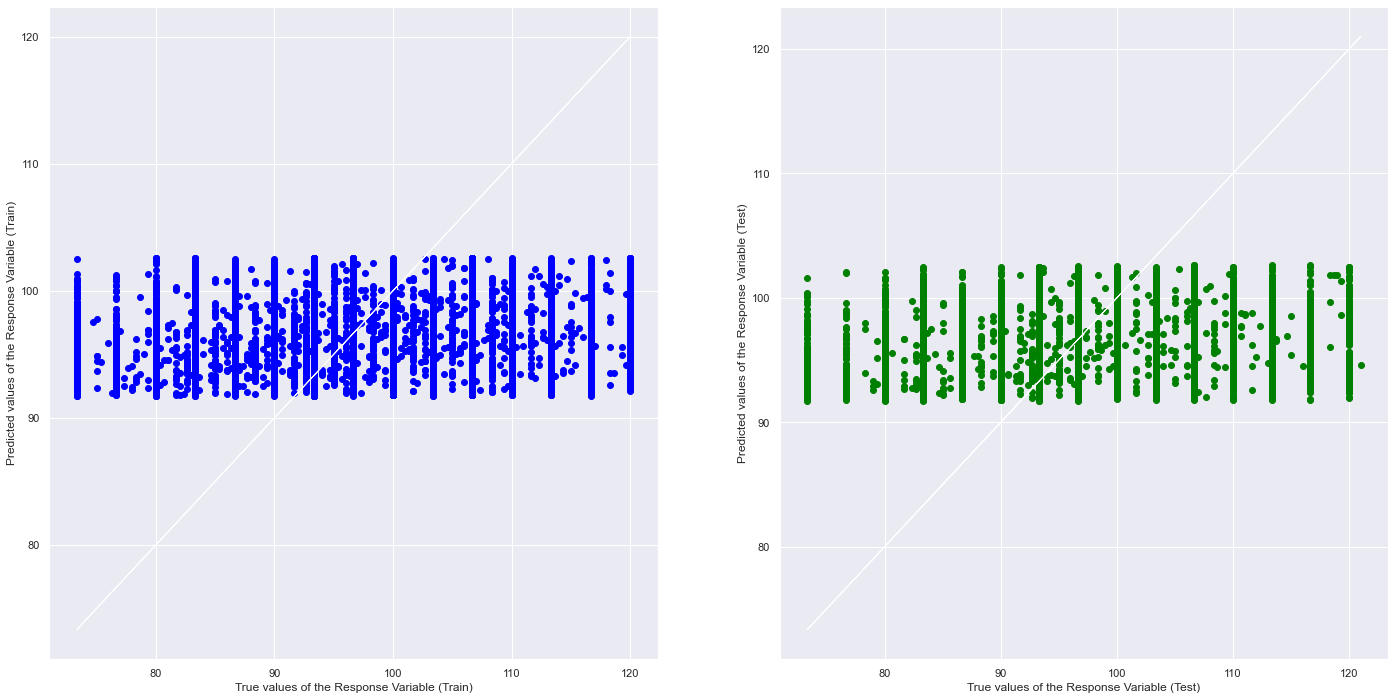

In [21]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(maleBMI, maleMAP, test_size = 0.25)  #input is X value which is hp, y-value is total
#test_size fix the number you want to test, which is 1/4 of the data set which is the same 200

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Predict MAP with BMI (Female)

In [22]:
femaleMAP = pd.DataFrame(female_df['MAP'])  # Response
femaleBMI = pd.DataFrame(female_df['bmi'])        # Predictor

In [23]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Intercept of Regression 	: b =  [81.74815417]
Coefficients of Regression 	: a =  [[0.59164547]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.055392126352016735
Mean Squared Error (MSE) 	: 75.85829687984068

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.06643854385016768
Mean Squared Error (MSE) 	: 72.68751125997306



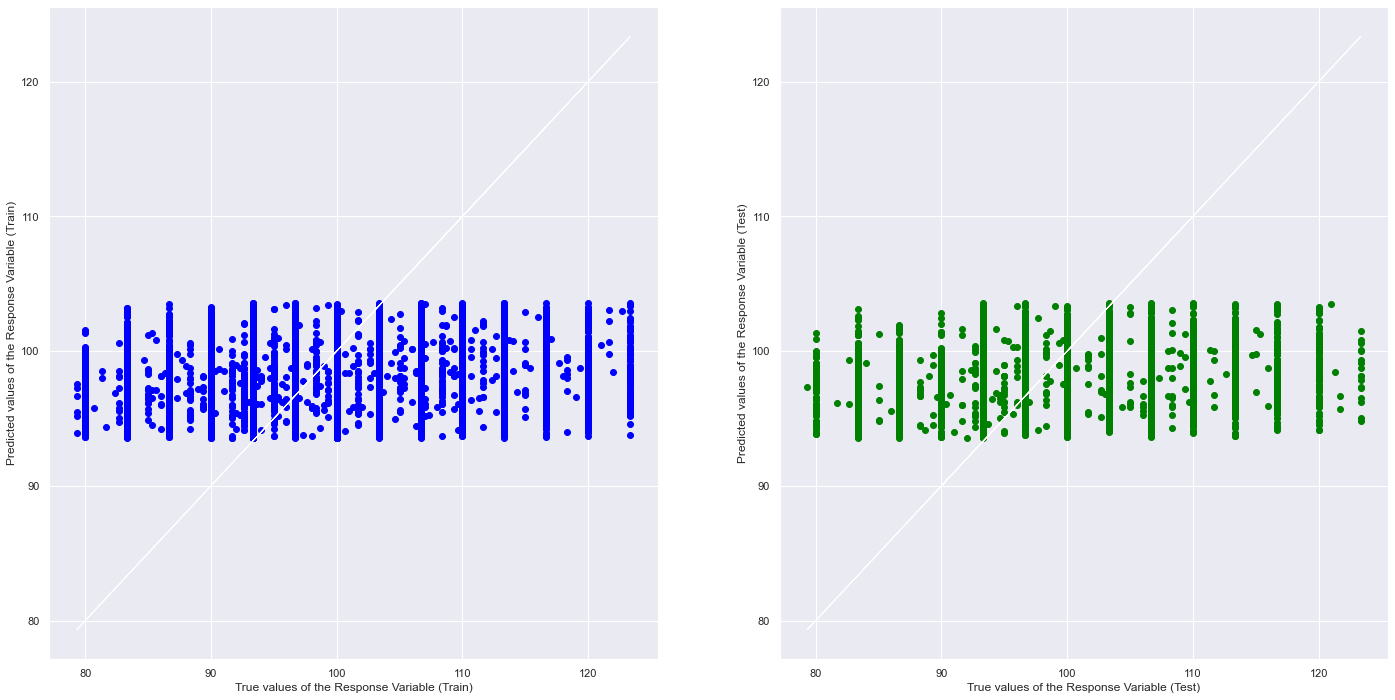

In [24]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(femaleBMI, femaleMAP, test_size = 0.25)  #input is X value which is hp, y-value is total
#test_size fix the number you want to test, which is 1/4 of the data set which is the same 200

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7237523809523809

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7318857142857143



<AxesSubplot:>

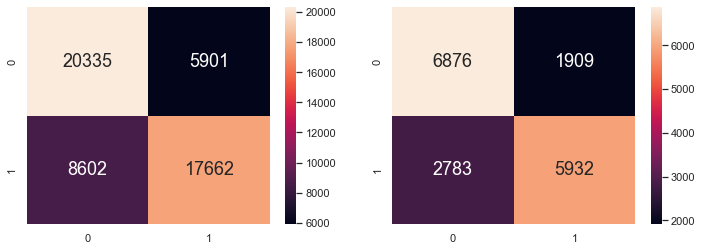

In [25]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["cholesterol", "smoke", "gluc", "ap_lo", "alco", "active","gender", "ap_hi", "weight", "height"]

# Recall the Legendary-Total Dataset
y = pd.DataFrame(newheartdata['cardio'])   # Response
X = pd.DataFrame(newheartdata[predictors])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
#capital X denotes variables in a matrix, while small letter y denotes a vector

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

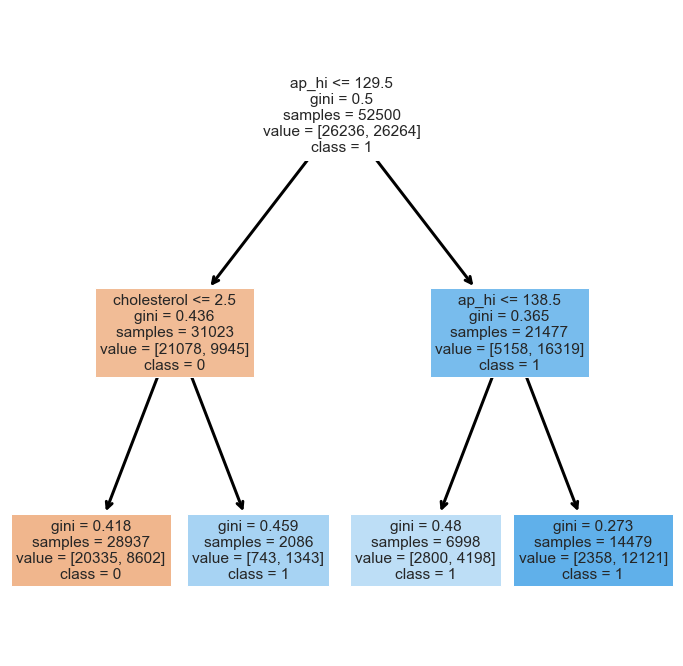

In [26]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()